In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay

#Read the file

In [32]:
df = pd.read_csv('/content/drive/MyDrive/CODSOFT/cus_churn/Churn_Modelling.csv')


dropping irrelavent columns

In [33]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography', 'Gender'], axis=1)

In [35]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [34]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [36]:
df.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1
9999,792,28,4,130142.79,1,1,0,38190.78,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.2 KB


In [38]:
df.columns = df.columns.str.strip().str.lower()

In [41]:
df.describe()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [40]:
df.isnull().sum()

creditscore        0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

#Split the data set

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#Train the model

In [43]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=500)

#Evaluate

In [44]:
y_pred = lr.predict(X_test)


In [49]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print ("precision :" , precision)
print ("recall :" , recall)
print ("accuracy :" , accuracy)
print ("f1 score :" , f1)

precision : 0.43636363636363634
recall : 0.0821917808219178
accuracy : 0.8006666666666666
f1 score : 0.13832853025936598


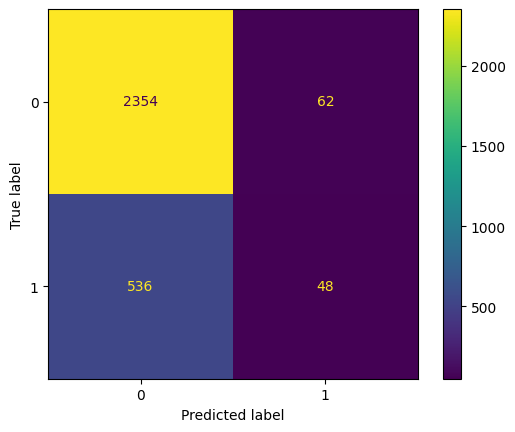

In [46]:
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred, labels=lr.classes_), display_labels=lr.classes_)
confusion_matrix_display.plot()


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

Text(0.5, 0, 'Logistic Regression Coefficient')

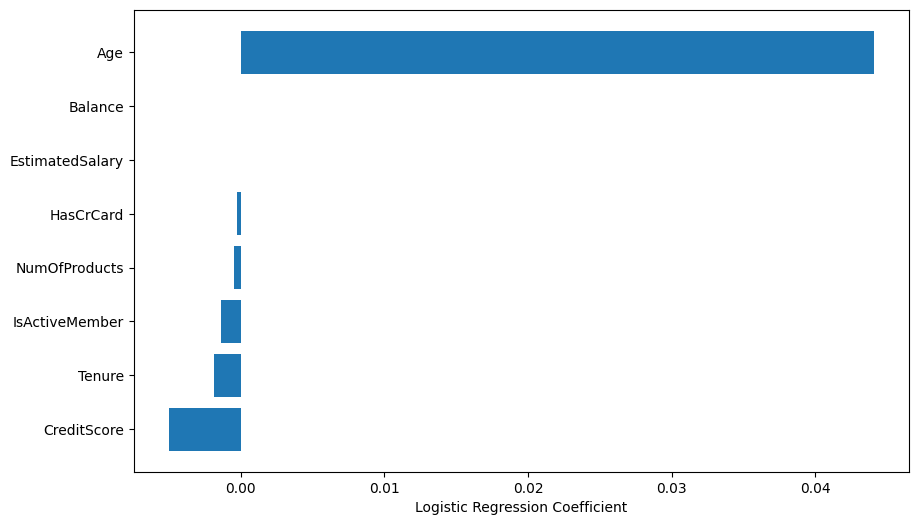

In [59]:
plt.figure(figsize=(10, 6))
coefs = lr.coef_.ravel()
names = X.columns
sorted_idx = np.argsort(coefs)
plt.barh(range(len(names)), coefs[sorted_idx])
plt.yticks(range(len(names)), [names[i] for i in sorted_idx])
plt.xlabel("Logistic Regression Coefficient")


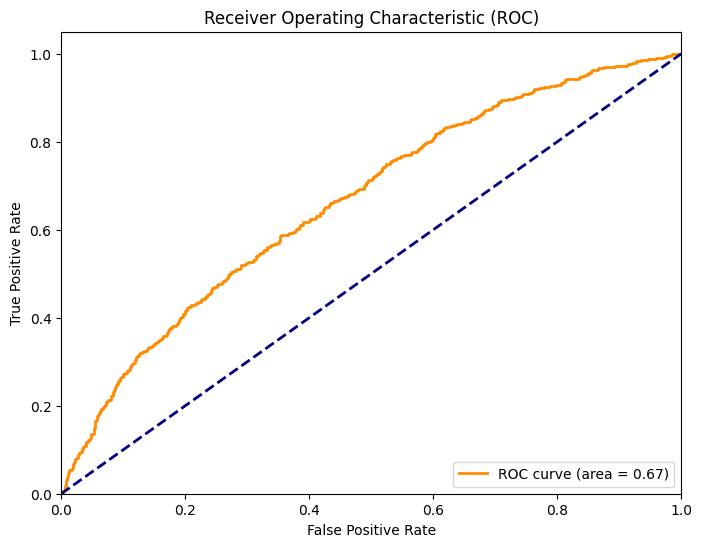

In [55]:
y_score = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')

Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier


In [62]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [64]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2416
           1       0.74      0.42      0.53       584

    accuracy                           0.86      3000
   macro avg       0.81      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



Text(0.5, 1.0, 'Random Forest Feature Importance')

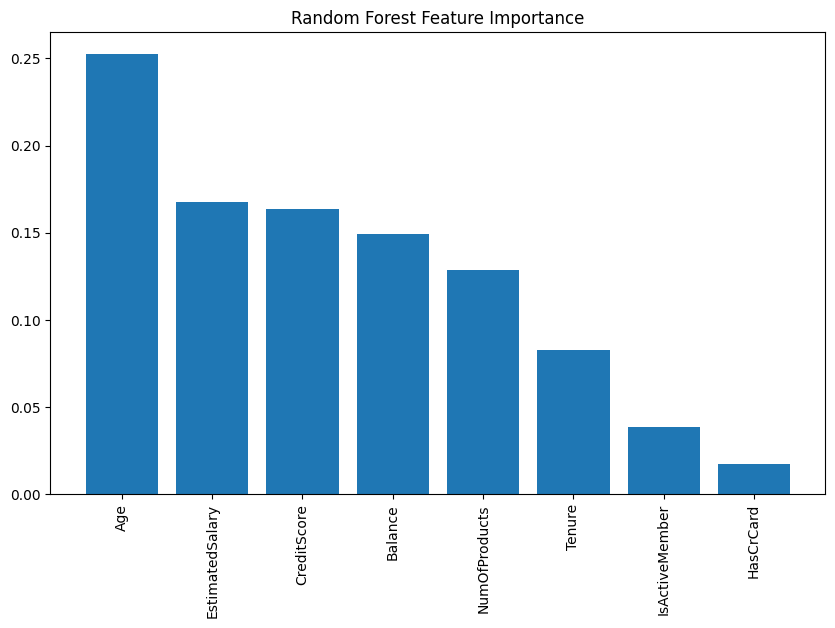

In [66]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Random Forest Feature Importance")

Heatmap for feature correlation

Text(0.5, 1.0, 'Correlation Heatmap')

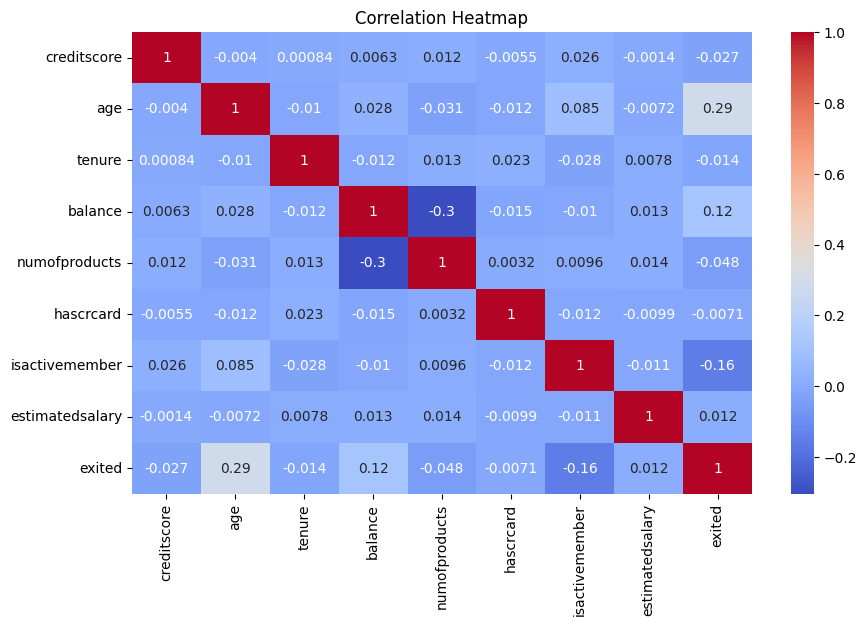

In [76]:

plt.figure(figsize=(10, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


#Data set visualization

In [81]:
df1 = pd.read_csv('/content/drive/MyDrive/CODSOFT/cus_churn/Churn_Modelling.csv')

Plotting a histogram for 'Age'

Text(0, 0.5, 'Frequency')

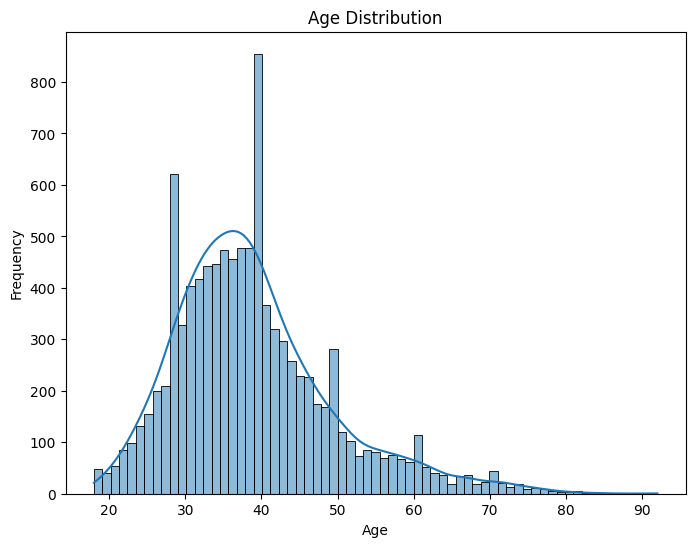

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Plotting a box plot for 'CreditScore'

Text(0, 0.5, 'CreditScore')

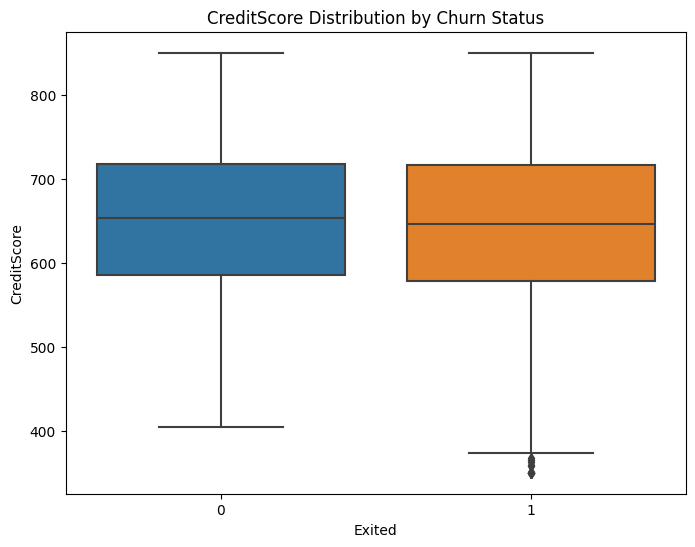

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df1)
plt.title('CreditScore Distribution by Churn Status')
plt.xlabel('Exited')
plt.ylabel('CreditScore')

Plotting a scatter plot for 'Age' vs. 'Balance'

Text(0, 0.5, 'Balance')

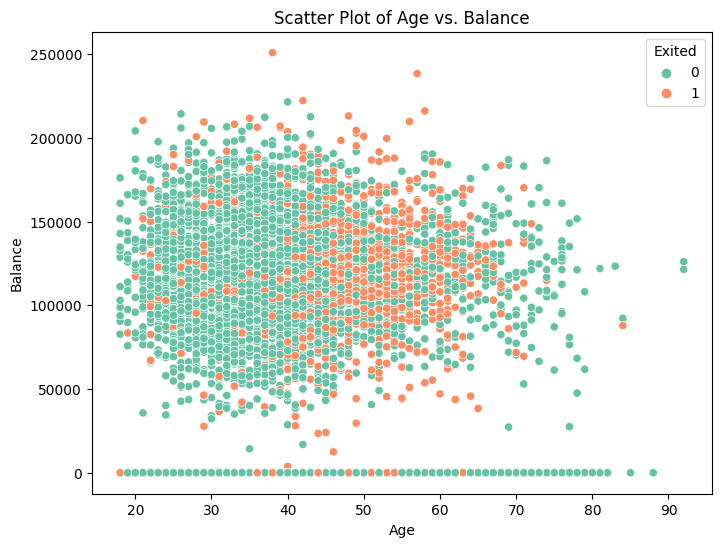

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='Age', y='Balance', hue='Exited', palette='Set2')
plt.title('Scatter Plot of Age vs. Balance')
plt.xlabel('Age')
plt.ylabel('Balance')

Plotting a bar chart for 'Geography' distribution

Text(0, 0.5, 'Count')

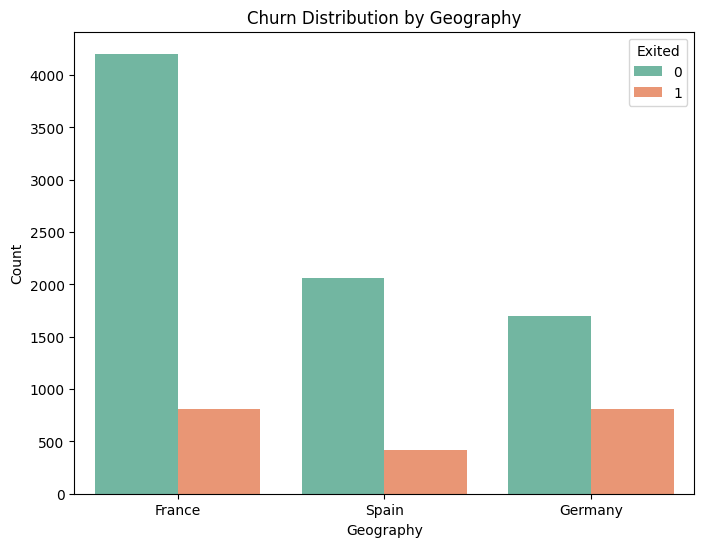

In [86]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df1, x='Geography', hue='Exited', palette='Set2')
plt.title('Churn Distribution by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')